# Модель для классификации FashionMNIST. 


In [1]:
import matplotlib.pyplot as plt
import time
import torch
import numpy as np
import torchvision as tv

%matplotlib inline

## Загрузил данные

In [2]:
BATCH_SIZE=256

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

## Просмотр данных

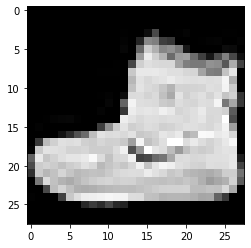

In [4]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray');

In [5]:
dataiter = iter(train)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([256, 1, 28, 28])
torch.Size([256])


## Модель

In [18]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.25),
    torch.nn.Linear(64, 10),
    torch.nn.LogSoftmax(dim = 1)
)
print(model)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=256, bias=True)
  (6): ReLU()
  (7): Dropout(p=0.3, inplace=False)
  (8): Linear(in_features=256, out_features=64, bias=True)
  (9): ReLU()
  (10): Dropout(p=0.25, inplace=False)
  (11): Linear(in_features=64, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)


In [19]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.002)
num_epochs = 15

# Обучаем модель

In [20]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.6893066701736856, train_acc: 0.7430166666666667, test_loss: 0.48842221572995187, test_acc: 0.8255
ep: 1, train_loss: 0.4235662918141548, train_acc: 0.8487333333333333, test_loss: 0.44562617093324663, test_acc: 0.8422
ep: 2, train_loss: 0.37576209211603123, train_acc: 0.8649333333333333, test_loss: 0.40463418923318384, test_acc: 0.8565
ep: 3, train_loss: 0.34222400721083296, train_acc: 0.8764, test_loss: 0.39803558867424726, test_acc: 0.8653
ep: 4, train_loss: 0.3224586013149708, train_acc: 0.8829666666666667, test_loss: 0.39210438542068005, test_acc: 0.864
ep: 5, train_loss: 0.30556894952946523, train_acc: 0.8889833333333333, test_loss: 0.390705780684948, test_acc: 0.869
ep: 6, train_loss: 0.2921724588313001, train_acc: 0.8936833333333334, test_loss: 0.36618358977139, test_acc: 0.875
ep: 7, train_loss: 0.2779481828212738, train_acc: 0.8980666666666667, test_loss: 0.3546031730249524, test_acc: 0.873
ep: 8, train_loss: 0.2722366204287143, train_acc: 0.9008, test_loss